In [1]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plotting
import numpy as np
import pandas as pd
%matplotlib inline
# For loading .arff files
from scipy.io import arff

In [2]:
############################################################
# Loads the 5 raw .arff files into a list
def load_arff_raw_data():
    N=5
    return [arff.loadarff(str(i+1) + 'year.arff') for i in range(N)]

############################################################
# Loads the 5 raw .arff files into pandas dataframes
def load_dataframes():
    return [pd.DataFrame(data_i_year[0]) for data_i_year in load_arff_raw_data()]

############################################################
# Set the column headers from X1 ... X64 and the class label as Y, for all the 5 dataframes.
def set_new_headers(dataframes):
    cols = ['X' + str(i+1) for i in range(len(dataframes[0].columns)-1)]
    cols.append('Y')
    for df in dataframes:
        df.columns = cols

############################################################
# dataframes is the list of pandas dataframes for the 5 year datafiles.  
dataframes = load_dataframes()

# Set the new headers for the dataframes. The new headers will have the renamed set of feature (X1 to X64)
set_new_headers(dataframes)    

# print the first 5 rows of a dataset 'year1'
dataframes[0].head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,Y
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,b'0'
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,b'0'
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,b'0'
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,b'0'
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,b'0'


In [3]:
dataframes[0].shape

(7027, 65)

In [4]:
# Convert the dtypes of all the columns (other than the class label columns) to float.
def convert_columns_type_float(dfs):
    for i in range(5):
        index = 1
        while(index<=63):
            colname = dfs[i].columns[index]
            col = getattr(dfs[i], colname)
            dfs[i][colname] = col.astype(float)
            index+=1
            
convert_columns_type_float(dataframes)    

In [5]:
# The class labels for all the dataframes are originally in object type.
# Convert them to int types
def convert_class_label_type_int(dfs):
    for i in range(len(dfs)):
        col = getattr(dfs[i], 'Y')
        dfs[i]['Y'] = col.astype(int)
        
convert_class_label_type_int(dataframes)

In [7]:
# To analyze the type of missing data
!pip install missingno
import missingno as msno

In [8]:
# Missing Values in the fourth Dataframe

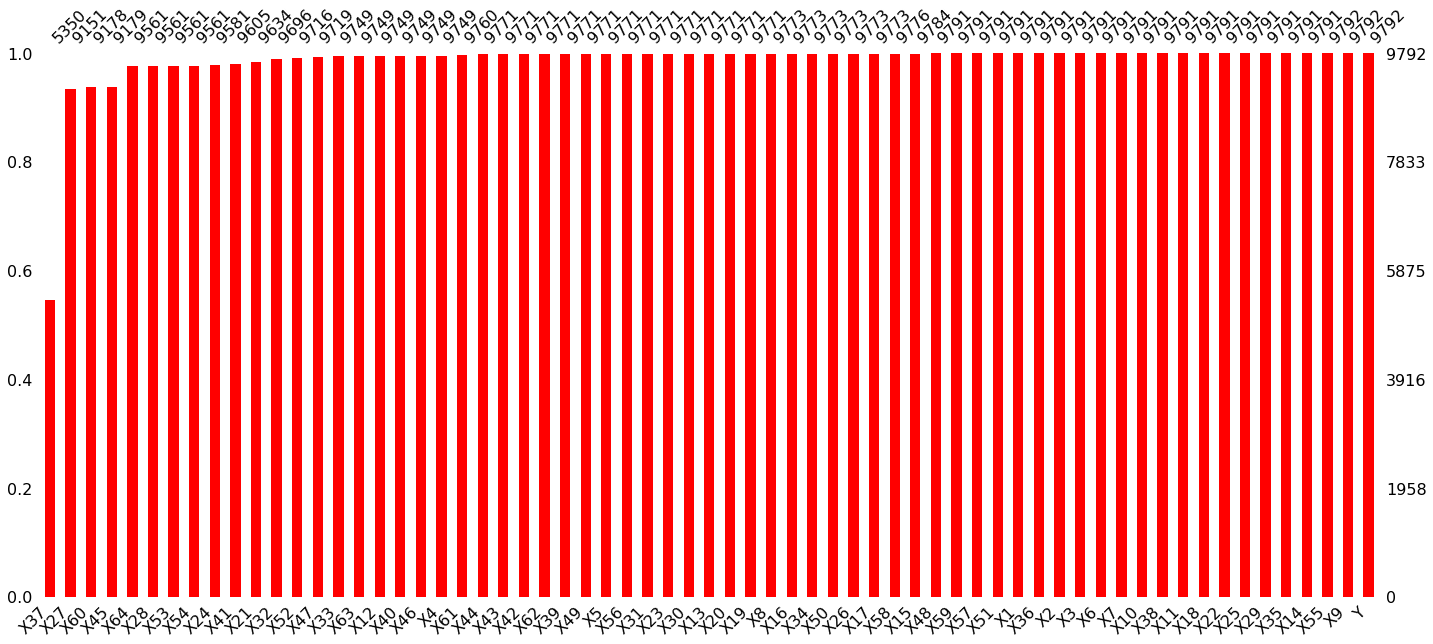

In [9]:
msno.bar(dataframes[3],color='red',labels=True,sort="ascending") 

In [10]:
# Missing Values in the fifth Dataframe

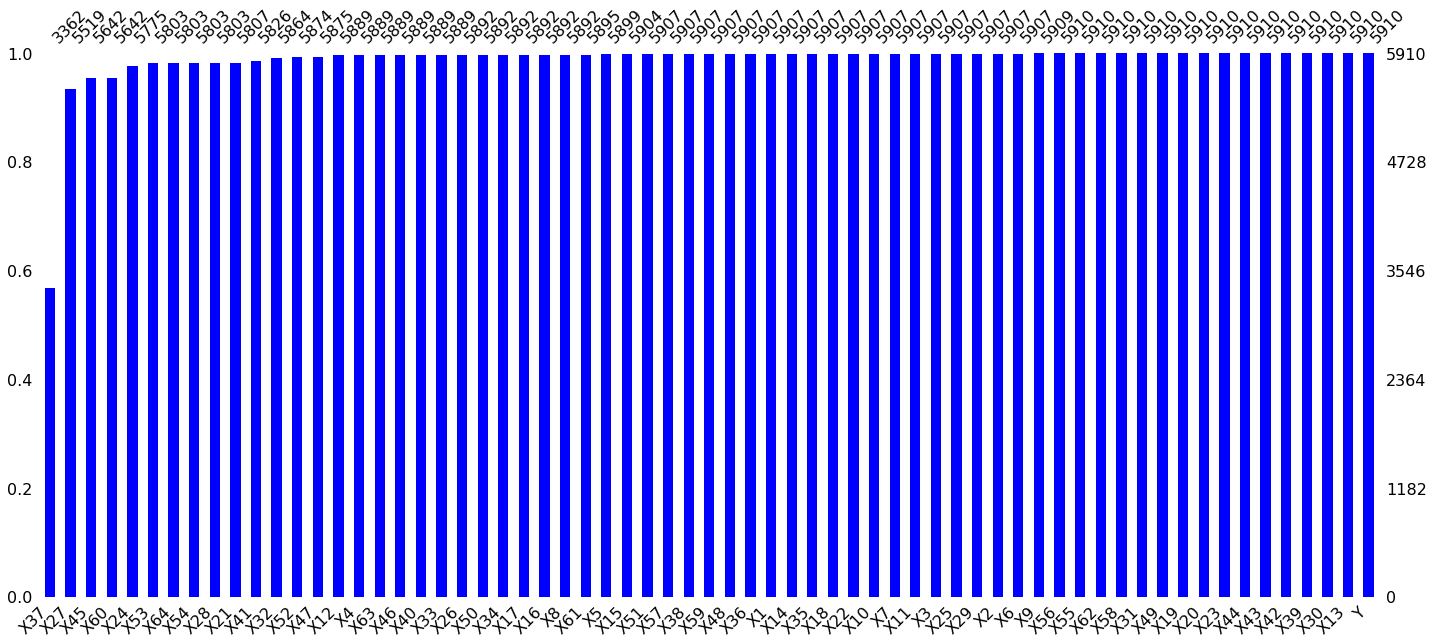

In [11]:
msno.bar(dataframes[4],color='blue',labels=True,sort="ascending") 

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [13]:
# Imputation for the fourth Dataframe

In [14]:
mean_imputed_df4=pd.DataFrame(imputer.fit_transform(dataframes[3]),columns=dataframes[0].columns)

In [15]:
# Imputation for the fifth Dataframe

In [16]:
mean_imputed_df5=pd.DataFrame(imputer.fit_transform(dataframes[4]),columns=dataframes[1].columns)

In [17]:
#Check for missing values 

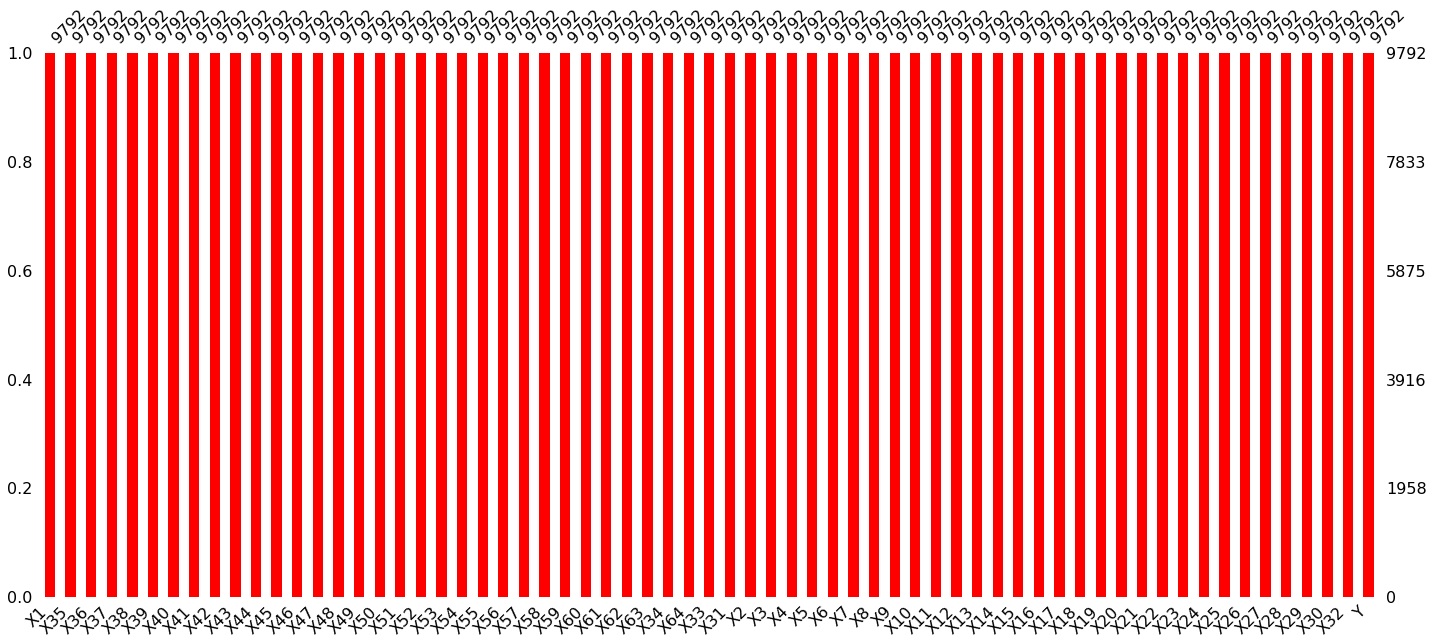

In [18]:
msno.bar(mean_imputed_df4,color='red',labels=True,sort="ascending") 

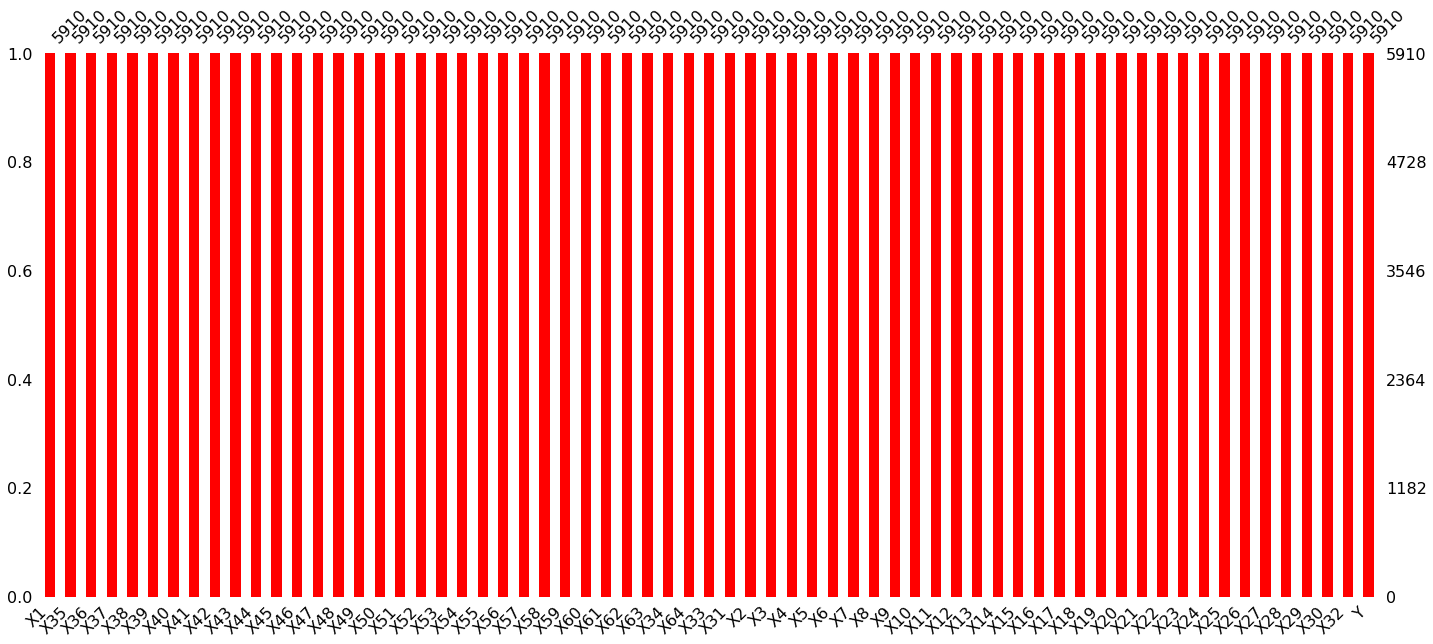

In [19]:
msno.bar(mean_imputed_df5,color='red',labels=True,sort="ascending") 

####  Iterative imputation

In [20]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [21]:
imputer = IterativeImputer()


In [22]:
iterative_imputed_df4 = pd.DataFrame(imputer.fit_transform(dataframes[3]),columns=dataframes[0].columns)

In [23]:
iterative_imputed_df5 = pd.DataFrame(imputer.fit_transform(dataframes[4]),columns=dataframes[1].columns)


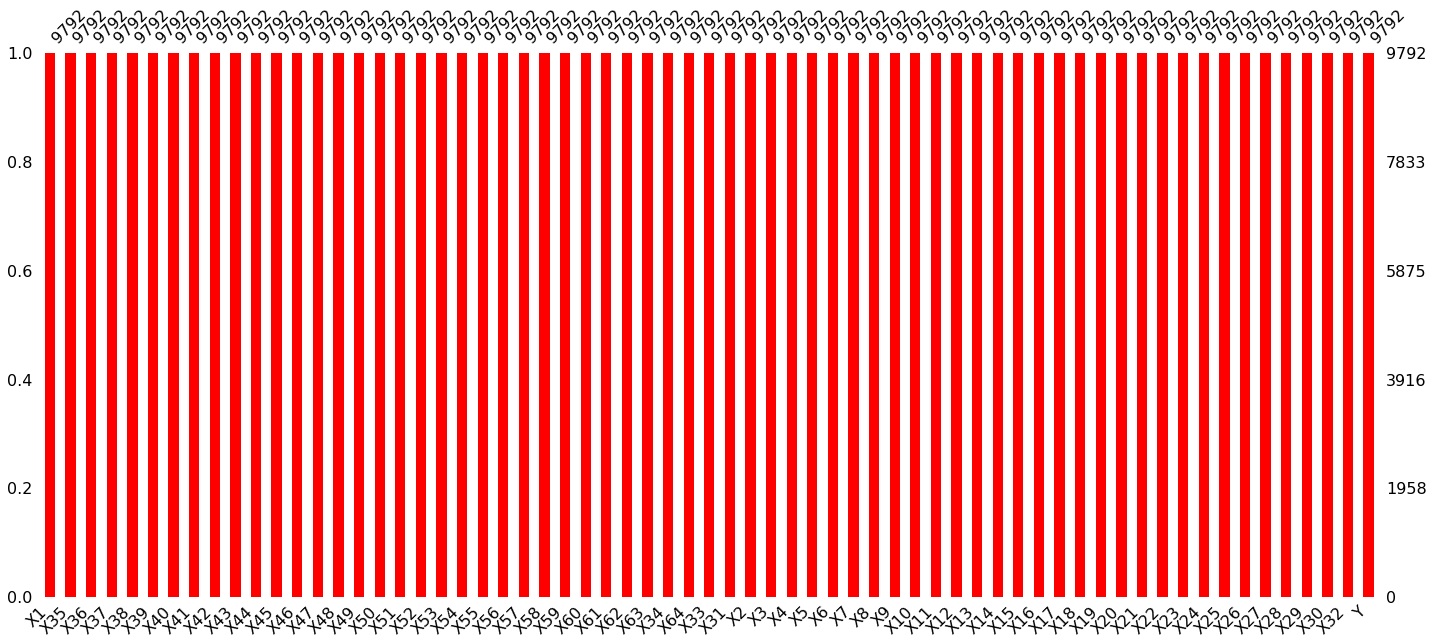

In [24]:
msno.bar(iterative_imputed_df4,color='red',labels=True,sort="ascending") 

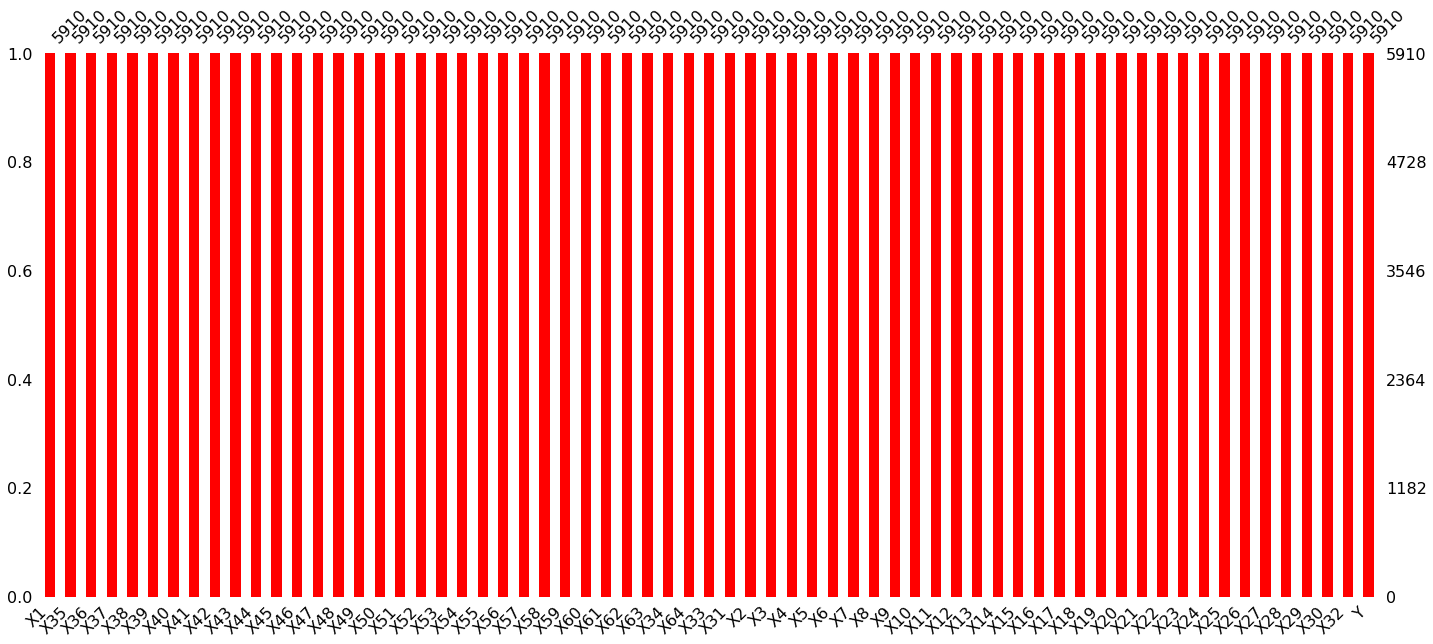

In [25]:
msno.bar(iterative_imputed_df5,color='red',labels=True,sort="ascending") 

In [26]:
X6=mean_imputed_df4.drop('Y',axis=1)
y6=mean_imputed_df4.Y

In [27]:

X7=mean_imputed_df5.drop('Y',axis=1)
y7=mean_imputed_df5.Y

In [28]:
X8=iterative_imputed_df4.drop('Y',axis=1)
y8=iterative_imputed_df4.Y

In [29]:
X9=iterative_imputed_df5.drop('Y',axis=1)
y9=iterative_imputed_df5.Y

In [30]:
#Feature selection for Dataframes

In [ ]:
#Activity 4.01

In [31]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
features_names=X6.columns.tolist()
lasso = Lasso(alpha=0.01 ,positive=True)
lasso.fit(X6,y6)
coef_list=sorted(zip(map(lambda x: round(x,4),
                    lasso.coef_.reshape(-1)),features_names),reverse=True)
coef_list [0:5]    

[(0.0009, 'X21'), (0.0002, 'X2'), (0.0001, 'X42'), (0.0, 'X9'), (0.0, 'X8')]

By performing LASSO regularization, we end with only 3 SIGNIFICANT features out of 64. The columns which are significant are given below. 
•X21 -sales (n) / sales (n-1)
•X2 - total liabilities / total assets
•X42 - profit on operating activities / sales



In [32]:
features_names=X7.columns.tolist()
lasso = Lasso(alpha=0.01 ,positive=True)
lasso.fit(X7,y7)
coef_list=sorted(zip(map(lambda x: round(x,4),
                    lasso.coef_.reshape(-1)),features_names),reverse=True)
coef_list [0:10] 

[(0.0216, 'X51'),
 (0.0015, 'X2'),
 (0.001, 'X9'),
 (0.001, 'X36'),
 (0.0003, 'X59'),
 (0.0003, 'X52'),
 (0.0001, 'X61'),
 (0.0001, 'X31'),
 (0.0001, 'X30'),
 (0.0001, 'X20')]

By performing LASSO regularization, we end with only 10 SIGNIFICANT features out of 64. The columns which are significant are given below. 
X51-short-term liabilities / total assets
X2-total liabilities / total assets
X9-sales / total assets
X36-total sales / total assets
X59-long-term liabilities / equity
X52-(short-term liabilities * 365) / cost of products sold)
X61-sales / receivables
X31-(gross profit + interest) / sales
X30-(total liabilities - cash) / sales
X20-(inventory * 365) / sales

In [33]:
features_names=X8.columns.tolist()
lasso = Lasso(alpha=0.01 ,positive=True)
lasso.fit(X8,y8)
coef_list=sorted(zip(map(lambda x: round(x,4),
                    lasso.coef_.reshape(-1)),features_names),reverse=True)
coef_list [0:5] 

[(0.0009, 'X21'), (0.0002, 'X2'), (0.0001, 'X42'), (0.0, 'X9'), (0.0, 'X8')]

By performing LASSO regularization, we end with only 10 SIGNIFICANT features out of 64. The columns which are significant are given below. 
X21-sales (n) / sales (n-1)
X2-total liabilities / total assets
X42-profit on operating activities / sales


In [34]:
features_names=X9.columns.tolist()
lasso = Lasso(alpha=0.01 ,positive=True)
lasso.fit(X9,y9)
coef_list=sorted(zip(map(lambda x: round(x,4),
                    lasso.coef_.reshape(-1)),features_names),reverse=True)
coef_list [0:10] 

[(0.0213, 'X51'),
 (0.0015, 'X2'),
 (0.0012, 'X9'),
 (0.0009, 'X36'),
 (0.0003, 'X59'),
 (0.0003, 'X52'),
 (0.0001, 'X61'),
 (0.0001, 'X31'),
 (0.0001, 'X30'),
 (0.0001, 'X20')]

By performing LASSO regularization, we end with only 10 SIGNIFICANT features out of 64. The columns which are significant are given below. 
X51-short-term liabilities / total assets
X2-total liabilities / total assets
X9-sales / total assets
X36-total sales / total assets
X59-long-term liabilities / equity
X52-(short-term liabilities * 365) / cost of products sold)
X61-sales / receivables
X31-(gross profit + interest) / sales
X30-(total liabilities - cash) / sales
X20-(inventory * 365) / sales